## Wk4 Assignment

## Lincoln Brown

## DSC550-T302

## Professor Werner



## Step 1: Import the Data

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor 

In [2]:
# Import Data File
f_name = "auto-mpg.csv"

# Load the dataframe and make sure it imported properly
df = pd.read_csv(f_name)
df['car name'].unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

## Step 2: Begin Prepping the Dataset

<ul>
    <li>Remove the car name column</li>
    <li>The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.</li>
    <li>Create dummy variables for the origin column</li>
</ul>

In [3]:
cleaned_df = df.drop(columns=['car name'])
cleaned_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


## Clean the Horsepower Column
Remove strings and impute with column mean

In [4]:
cleaned_df['horsepower'] = cleaned_df['horsepower'].apply(pd.to_numeric, errors = 'coerce')
cleaned_df['horsepower'] = cleaned_df['horsepower'].fillna(cleaned_df['horsepower'].mean())


## Create Dummy Variables for the Origin Column

In [5]:
cleaned_df['origin'].unique()

array([1, 3, 2])

## Create Dummy Variables for the Origin Column

In [6]:
# Create one hot encodings for the origin column
one_hot_encoded = pd.get_dummies(cleaned_df['origin'], prefix='origin', dtype='float')

In [7]:
# Add the one_hot_encoded columns onto the cleaned_df dataframe
cleaned_df = pd.concat([cleaned_df, one_hot_encoded], axis=1)

In [8]:
# View the new dataframe
cleaned_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,2,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295,11.6,82,1,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,1,1.0,0.0,0.0


## Step 3: Create a Correlation Coefficient Matrix


In [9]:
cleaned_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,origin_1,origin_2,origin_3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662,-0.139883,-0.024489,0.193101
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000,-0.924486,0.246332,0.886596
origin_1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,-0.924486,1.000000,-0.597198,-0.643317
origin_2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,0.246332,-0.597198,1.000000,-0.229895


In [10]:
# Create a rounded correlation matrix that is easier to read
matrix = cleaned_df.corr().round(2)

# Create a triangle mask to hide duplicate entries in the matrix
mask = np.triu(np.ones_like(matrix, dtype=bool))

<Axes: >

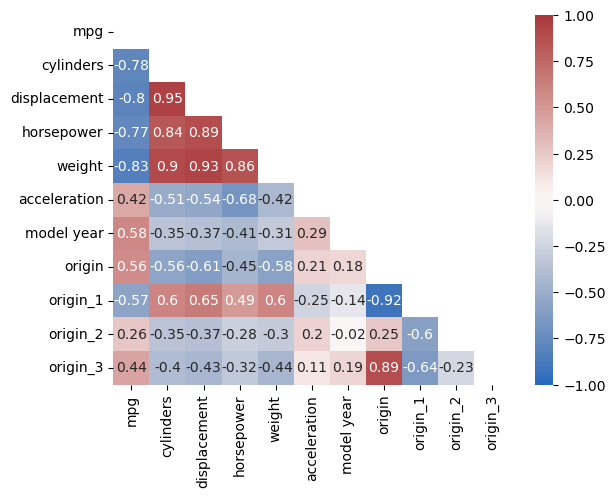

In [11]:
# Display a heatmap to view the correlation matrix easily
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)

## Correlation Heatmap Discussion
The columns that had the highest correlation with mpg weight, displacement, and cylinders. The first is weight with a correlation at -0.83, the second is displacement at -0.8, and the third is cylinders at -0.78.  

## Step 4: Plot the Data
Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

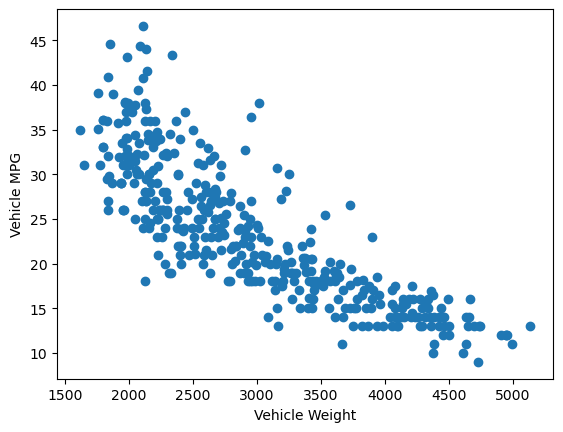

In [12]:
# Create a normal scatter plot
plt.scatter(cleaned_df['weight'], cleaned_df['mpg'])
plt.xlabel("Vehicle Weight")
plt.ylabel("Vehicle MPG")
plt.show()

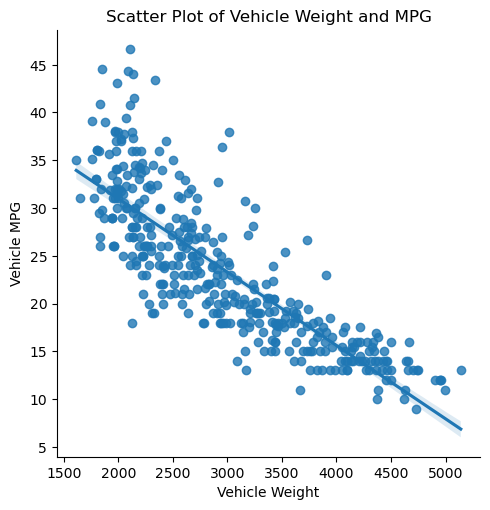

In [13]:
# Create a scatter plot with line of perfect fit
sns.lmplot(data=cleaned_df, x='weight', y='mpg')
plt.title("Scatter Plot of Vehicle Weight and MPG")
plt.xlabel("Vehicle Weight")
plt.ylabel("Vehicle MPG")
plt.show()

## Scatter Plot Analysis

From the graph above we can see a negative corelation between mpg and weight. As the weight increases, the miles per gallon decreases. It demonstrates a strong negative correlation. The line of perfect fit helps to illustrate how strong the correlation is and to better identify the a perfect negative trend. We can see that there are some outliers in the plot, but most points are gathered around the line of perfect fit. 

## Step 5: Split the Data

Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [28]:
# Drop the mpg column so that all of the features are together
X = cleaned_df.drop("mpg", axis=1)
y = cleaned_df['mpg'] # Create the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X Train set shape {X_train.shape}")
print(f"X Test set shape {X_test.shape}")
print(f"y train set shape {y_train.shape}")
print(f"y test set shape {y_test.shape}")


X Train set shape (318, 10)
X Test set shape (80, 10)
y train set shape (318,)
y test set shape (80,)


## Step 6: Train the data 

Train an ordinary linear regression on the training data

In [29]:
# Create linear regression model
regression = LinearRegression()

# Train the model
model = regression.fit(X_train, y_train)

In [30]:
# Make predictions on the training data
y_train_prediction = model.predict(X_train)

# Make predictions on the test data 
y_test_prediction = model.predict(X_test)

## Step 7: Calculate R2, RMSE, and MAE

Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.


In [31]:
# R2 Scores
train_r2 = r2_score(y_train, y_train_prediction)
test_r2 = r2_score(y_test, y_test_prediction)
print(f"Train R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")

Train R2 Score: 0.8188288951042786
Test R2 Score: 0.8449006123776617


In [32]:
# RMSE 
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_prediction))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_prediction))
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

Train RMSE: 3.3702735639389054
Test RMSE: 2.8877573478836314


In [33]:
# MAE
train_mae = mean_absolute_error(y_train, y_train_prediction)
test_mae = mean_absolute_error(y_test, y_test_prediction)
print(f"Train MAE {train_mae}")
print(f"Test MAE {test_mae}")

Train MAE 2.6054846937710354
Test MAE 2.2875867704421067


In [34]:
# MAPE
train_mape = mean_absolute_percentage_error(y_train, y_train_prediction)
test_mape = mean_absolute_percentage_error(y_test, y_test_prediction)
print(f"Train MAPE {train_mape}")
print(f"Test MAPE {test_mape}")

Train MAPE 0.12005579547842314
Test MAPE 0.11621598325246248


## Interpret the Results

### R2 Score

The R2 Scores for both the train and test sets performed pretty good with scores of 81.88% and 84.49%, respectively. R2 Scores can be interpreted as the percentage of the dependent variable (mpg in this case) variance is explained by the independent variables (Allwright, 2022). The better score for the test data is a good sign that indicates the model generalizes well to new, previously unseen data. The ability to generalize well is an indication that our model is not overfit. 

### RMSE Root Mean Squared Error

RMSE is used to assess how well a regression model fits a dataset by using the average distance between the predicted values from the actual values. Since this is an error value, we want a lower value. RMSE provides us with the square root of the variance of the residuals. The low scores indicate that this model is a good fit for the data and the lower test score indicates that it generalizes well.   

### MAE Mean Average Error

MAE is a measure of model accuracy on the same scale as the prediction target. Therefore, it is important to remember that MAE values need to be viewed at in relation to the dataset. With a train and test score of 2.6 and 2.28 respectively, this is a pretty good error value for the dataset. If we wanted to view this outside of the context of the dataset, we can use Mean Absolute Percentage Error or MAPE

The MAPE percentages were 12% for train and 11% for test, which is a good value to have. Stephen Allwright recommends less than 20% as being good. 



References:
Allwright, S. (2022, December 6). How to interpret R Squared (simply explained). Stephen Allwright. https://stephenallwright.com/interpret-r-squared/

## Step 8: Pick Another Model
Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.

We will look at Gradient Boosting Regression for the alternative model

## Create a Gradient Boosting Regression Model


In [40]:
# Create the model
reg = GradientBoostingRegressor()
# Train the model
gbr_model = reg.fit(X_train, y_train)

In [48]:
# Make predictions on the training data
gbr_y_train_prediction = gbr_model.predict(X_train)

In [49]:
# Make predictions on the test data
gbr_y_test_prediction = gbr_model.predict(X_test)

In [52]:
# R2 Scores

gbr_train_r2 = r2_score(y_train, gbr_y_train_prediction)
gbr_test_r2 = r2_score(y_test, gbr_y_test_prediction)
print(f"GBR Train R2 Score: {gbr_train_r2}")
print(f"GBR Test R2 Score: {gbr_test_r2}")

GBR Train R2 Score: 0.9722703074402246
GBR Test R2 Score: 0.9040249857006827


In [54]:
# RMSE 
gbr_train_rmse = np.sqrt(mean_squared_error(y_train, gbr_y_train_prediction))
gbr_test_rmse = np.sqrt(mean_squared_error(y_test, gbr_y_test_prediction))
print(f"Train RMSE: {gbr_train_rmse}")
print(f"Test RMSE: {gbr_test_rmse}")

Train RMSE: 1.3185397125087797
Test RMSE: 2.271615109944836


In [53]:
# MAE
gbr_train_mae = mean_absolute_error(y_train, gbr_y_train_prediction)
gbr_test_mae = mean_absolute_error(y_test, gbr_y_test_prediction)
print(f"GBR Train MAE {gbr_train_mae}")
print(f"GBR Test MAE {gbr_test_mae}")

GBR Train MAE 1.0276315935126283
GBR Test MAE 1.7152216179576325
